In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
%matplotlib inline

In [100]:
iris = datasets.load_iris()

In [101]:
X = iris.data
y = iris.target
n_classes = 3

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
features_pair = [2, 3]
cls = DecisionTreeClassifier(max_depth=2).fit(X[:, features_pair], y)

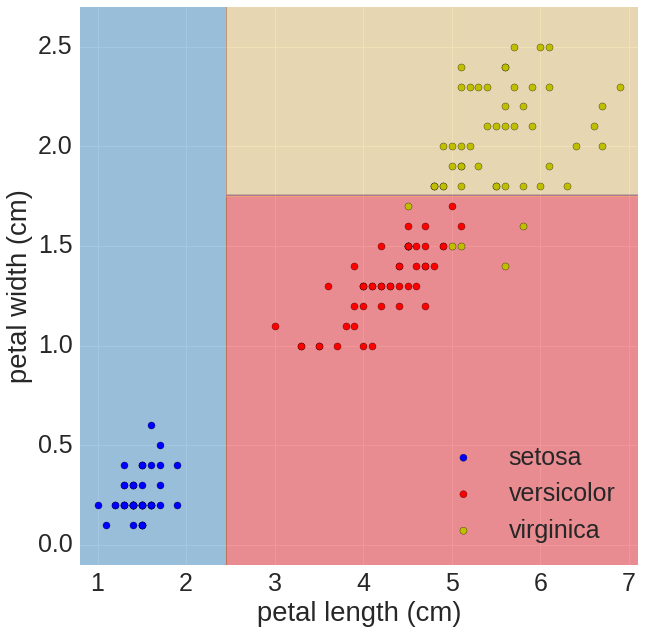

In [133]:
plot_colors = "bry"
plot_step = 0.01
x_min, x_max = X[:, features_pair[0]].min() - 1, X[:, features_pair[0]].max() + 1
y_min, y_max = X[:, features_pair[1]].min() - 1, X[:, features_pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale=2.5)
plt.figure(figsize=(10,10))
plt.xlabel(iris.feature_names[features_pair[0]])
plt.ylabel(iris.feature_names[features_pair[1]])
plt.xlim((x_min + 0.8, x_max - 0.8))
plt.ylim((y_min + 0.8, y_max - 0.8))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
# cs = plt.contourf(xx, yy, Z, colors=('b', 'r', 'y'))


# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, features_pair[0]], X[idx, features_pair[1]], s=50, c=color, label=iris.target_names[i])
legend = plt.legend(loc=4)
plt.savefig('../fig/iris_ds.pdf')
plt.show()


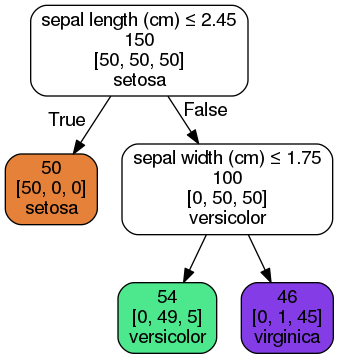

In [109]:
from IPython.display import Image 
from sklearn.tree import export_graphviz
from StringIO import StringIO
import pydot 
dot_data = StringIO()
export_graphviz(cls, out_file=dot_data,  
                feature_names=iris.feature_names,  
                class_names=iris.target_names,  
                filled=True, rounded=True,  
                special_characters=True,
               impurity=False,
               label='none')
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())  

In [111]:
print dot_data.getvalue()


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sepal length (cm) &le; 2.45<br/>150<br/>[50, 50, 50]<br/>setosa>, fillcolor="#e5813900"] ;
1 [label=<50<br/>[50, 0, 0]<br/>setosa>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<sepal width (cm) &le; 1.75<br/>100<br/>[0, 50, 50]<br/>versicolor>, fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<54<br/>[0, 49, 5]<br/>versicolor>, fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label=<46<br/>[0, 1, 45]<br/>virginica>, fillcolor="#8139e5f9"] ;
2 -> 4 ;
}


In [134]:
d = """
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sepal length (cm) &le; 2.45>, fillcolor="#e5813900"] ;
1 [label=<setosa>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<sepal width (cm) &le; 1.75<br/>>, fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<versicolor>, fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label=<virginica>, fillcolor="#8139e5f9"] ;
2 -> 4 ;
}
"""

In [135]:
print d


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sepal length (cm) &le; 2.45>, fillcolor="#e5813900"] ;
1 [label=<setosa>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<sepal width (cm) &le; 1.75<br/>>, fillcolor="#39e58100"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<versicolor>, fillcolor="#39e581e5"] ;
2 -> 3 ;
4 [label=<virginica>, fillcolor="#8139e5f9"] ;
2 -> 4 ;
}



In [140]:
graph = pydot.graph_from_dot_data(d)
Image(graph[0].create_png(600)) 

TypeError: cannot concatenate 'str' and 'int' objects

In [142]:
g = graph[0]

In [144]:
g.write_pdf('../fig/iris_dt.pdf')

True